In [26]:
!pip install yfinance
!pip install yahoofinancials
!pip install stockstats
!pip install talib-binary
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from stockstats import StockDataFrame
import talib as ta
import mplfinance as mpf
import requests
import json
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots


In [28]:
SPY_df = yf.download('SPY', 
                      start='1993-02-01', 
                      end='2022-05-29', 
                      progress=False,
)
SPY_df.index.name = 'Date'
SPY_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.729692,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.784187,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.056774,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.165787,531500
1993-02-05,44.96875,45.06250,44.71875,44.96875,26.147610,492100


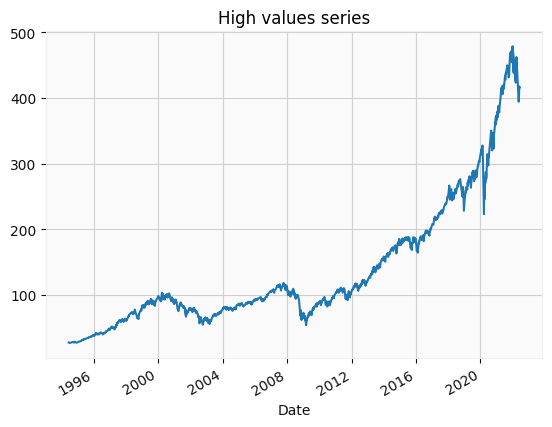

In [29]:
ticker = yf.Ticker('SPY')
SPY_df = ticker.history(period="28y")
SPY_df['High'].plot(title="High values series")
SPY_df.to_csv('SPY.csv')

In [30]:
df = pd.read_csv("SPY.csv")

In [31]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1994-06-08,27.736489,27.736489,27.446104,27.446104,131900,0.0,0
1,1994-06-09,27.567876,27.595978,27.511672,27.595978,80500,0.0,0
2,1994-06-10,27.624076,27.699014,27.624076,27.642811,83100,0.0,0
3,1994-06-13,27.605329,27.689635,27.595962,27.680267,109700,0.0,0
4,1994-06-14,27.764585,27.905094,27.764585,27.895727,161000,0.0,0


In [32]:
df[df["High"] > 348]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6607,2020-09-02,346.054288,350.035162,344.844390,349.010681,69540000,0.0,0
6654,2020-11-09,356.549954,356.951600,346.841980,347.331787,172304200,0.0,0
6656,2020-11-11,349.134258,350.270614,347.821580,349.398773,58649000,0.0,0
6657,2020-11-12,348.330957,349.447730,344.099049,346.009277,67546200,0.0,0
6658,2020-11-13,348.027268,351.583270,347.478687,350.799591,62892200,0.0,0
...,...,...,...,...,...,...,...,...
7047,2022-06-02,409.420013,417.440002,407.040009,417.390015,79609600,0.0,0
7048,2022-06-03,412.399994,414.040009,409.510010,410.540009,71830800,0.0,0
7049,2022-06-06,414.779999,416.609985,410.549988,411.790009,57508900,0.0,0
7050,2022-06-07,408.100006,416.220001,407.609985,415.739990,59053100,0.0,0


In [33]:
df[df["High"] < 64.5]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1994-06-08,27.736489,27.736489,27.446104,27.446104,131900,0.0,0
1,1994-06-09,27.567876,27.595978,27.511672,27.595978,80500,0.0,0
2,1994-06-10,27.624076,27.699014,27.624076,27.642811,83100,0.0,0
3,1994-06-13,27.605329,27.689635,27.595962,27.680267,109700,0.0,0
4,1994-06-14,27.764585,27.905094,27.764585,27.895727,161000,0.0,0
...,...,...,...,...,...,...,...,...
3728,2009-03-27,63.863414,64.237017,63.287432,63.520939,322332300,0.0,0
3729,2009-03-30,62.112156,62.166640,60.679993,61.326023,324108500,0.0,0
3730,2009-03-31,61.925361,63.108453,61.528408,61.894226,364238300,0.0,0
3731,2009-04-01,61.123635,63.373059,60.967968,63.092854,377018300,0.0,0


In [34]:
SPY_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7052 entries, 1994-06-08 to 2022-06-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7052 non-null   float64
 1   High          7052 non-null   float64
 2   Low           7052 non-null   float64
 3   Close         7052 non-null   float64
 4   Volume        7052 non-null   int64  
 5   Dividends     7052 non-null   float64
 6   Stock Splits  7052 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 440.8 KB


In [35]:
SPY_df["High"].describe()

count    7052.000000
mean      137.461749
std        99.316990
min        26.967508
25%        75.695553
50%        96.511644
75%       181.142360
max       478.493512
Name: High, dtype: float64

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


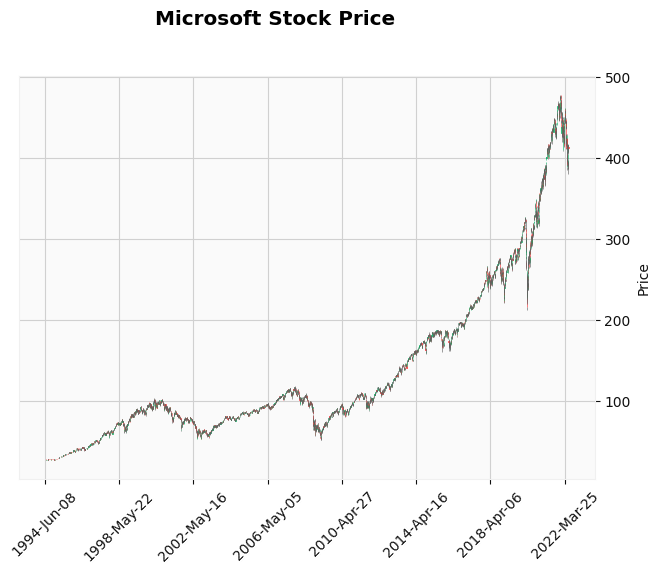

In [36]:
mpf.plot(
    SPY_df,
    type="candle", 
    title = "Microsoft Stock Price",  
    style="yahoo"
    )

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:46: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


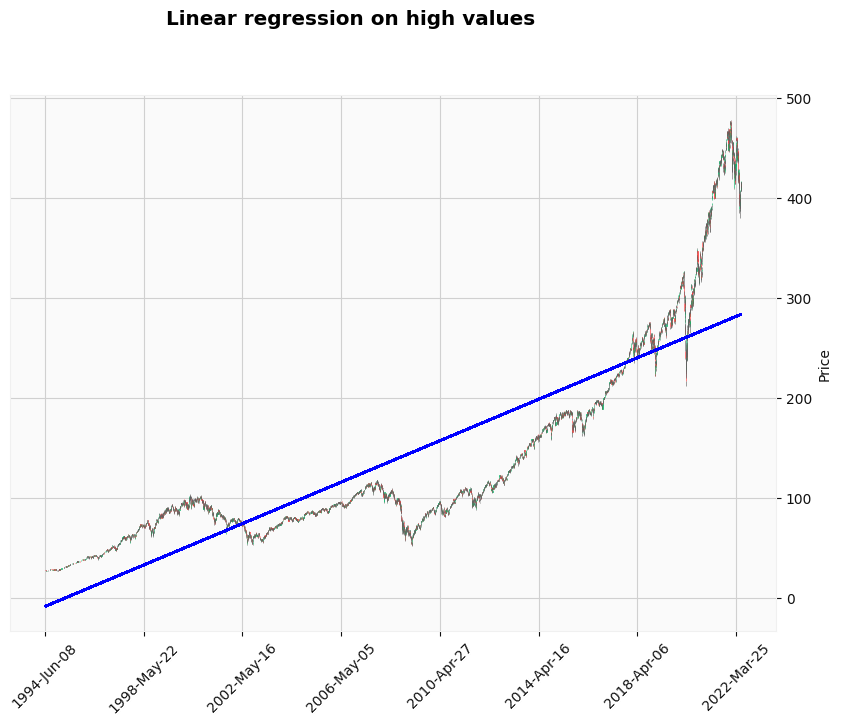

In [37]:


d1 = SPY_df.index[ 0]
d2 = SPY_df.index[-1]
tdates = [(d1,d2)]
mpf.plot(SPY_df,tlines=
         [
          dict(tlines=tdates,tline_use=['high'],tline_method='least-squares',colors='b'),
         ],
         figscale=1.33,
         type="candle",
         title="Linear regression on high values",
         style="yahoo"
         
        )



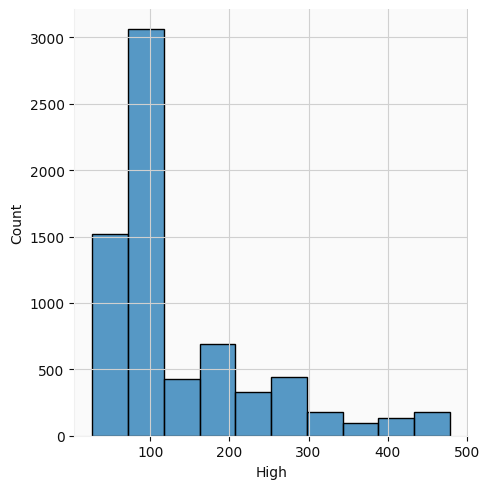

In [38]:
sns.displot(SPY_df, x="High", bins=10);

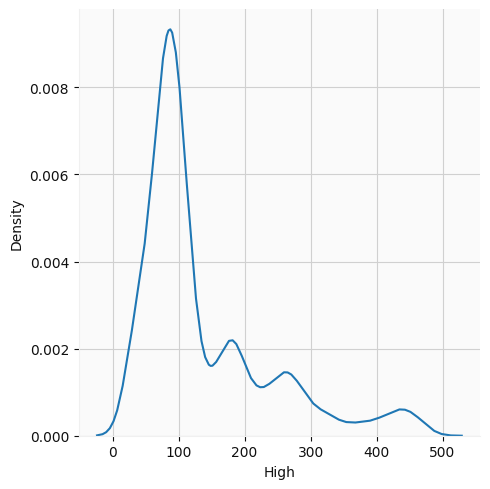

In [39]:
sns.displot(SPY_df, x="High", kind="kde");

In [40]:
sm.tsa.acf(SPY_df["High"])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([1.        , 0.99924438, 0.99846879, 0.99769298, 0.99693343,
       0.99615785, 0.99538034, 0.99460703, 0.99383723, 0.99309139,
       0.99236579, 0.99165552, 0.99093225, 0.99020816, 0.98949661,
       0.98875142, 0.98799484, 0.98724849, 0.98651198, 0.98580855,
       0.98507582, 0.98432978, 0.98358899, 0.98281992, 0.9820144 ,
       0.9811884 , 0.98040837, 0.97964711, 0.97884554, 0.97803318,
       0.97724413, 0.97644021, 0.97562915, 0.97478306, 0.97388616,
       0.97299585, 0.97212269, 0.97126752, 0.97039116, 0.96951013,
       0.96861828])

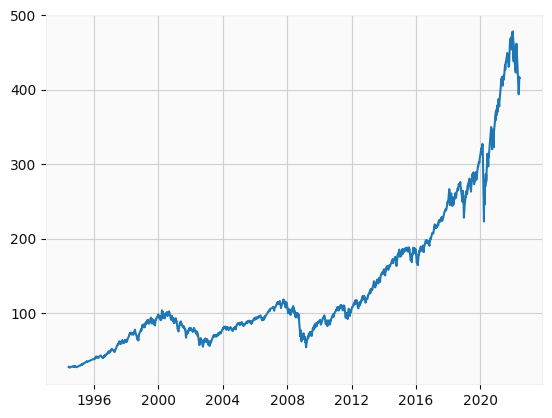

In [41]:
plt.plot(SPY_df["High"])

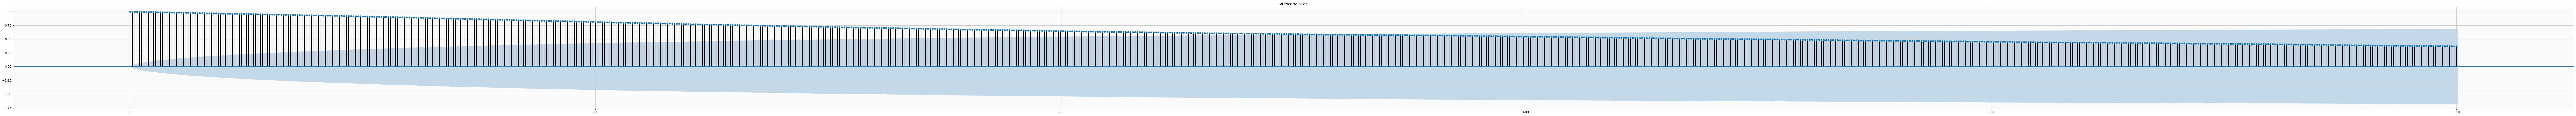

In [42]:
fig, ax = plt.subplots(figsize=(150, 6))
tsaplots.plot_acf(SPY_df["High"].values.squeeze(), lags=1000, ax=ax)
plt.show()

In [43]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

In [44]:
diff = difference(SPY_df["High"].values)

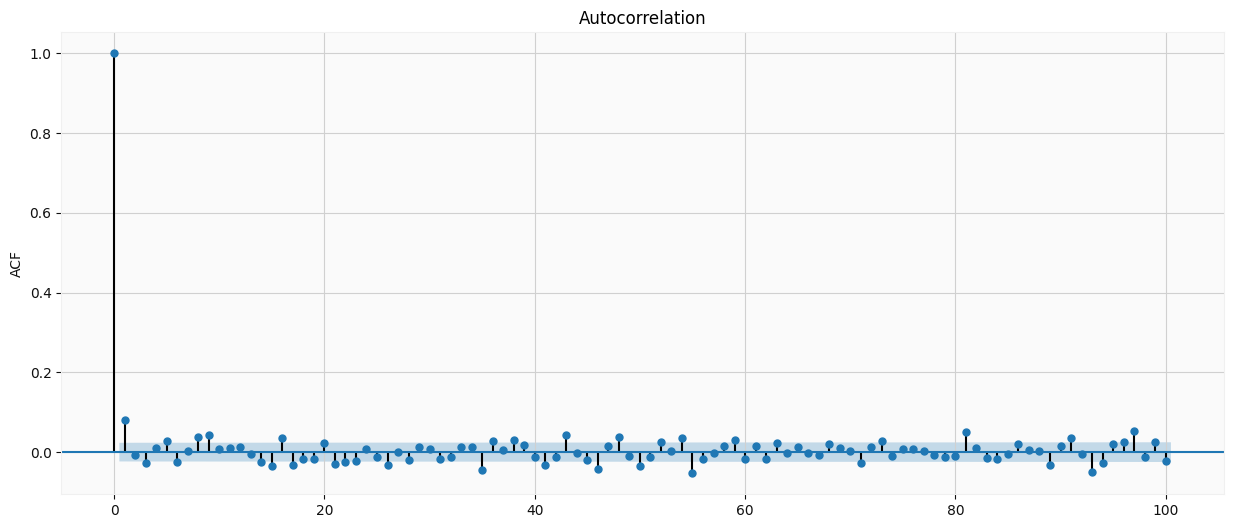

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))
tsaplots.plot_acf(diff, lags=100, ax=ax)
plt.ylabel("ACF")
plt.show()

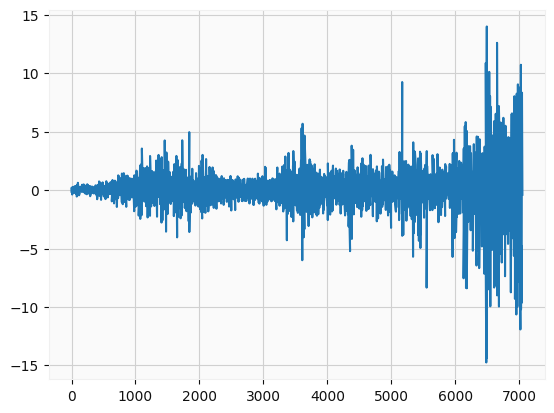

In [46]:
plt.plot(diff)
plt.show()

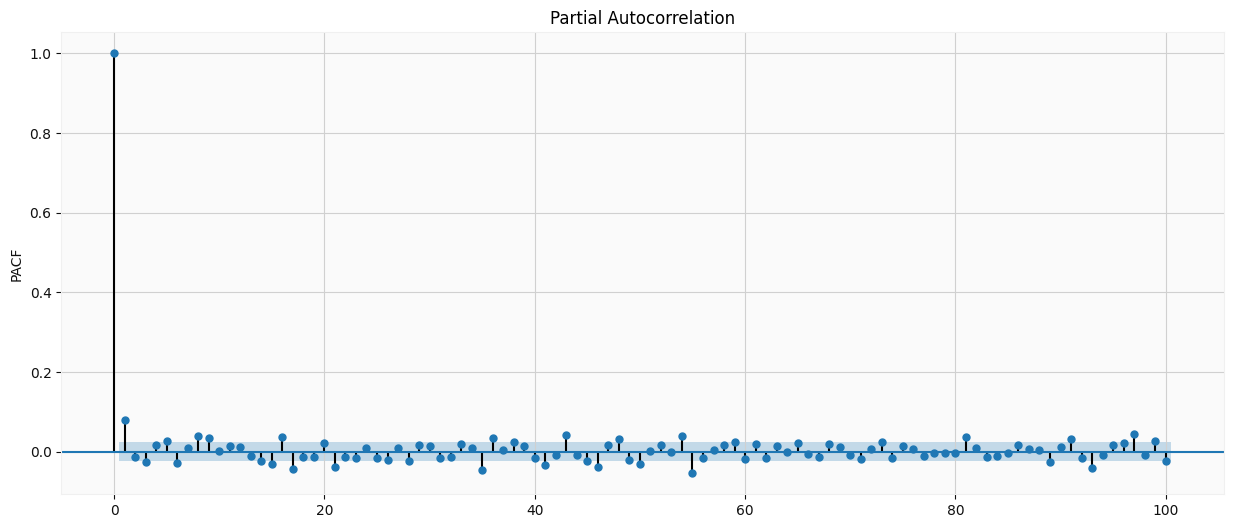

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))
tsaplots.plot_pacf(diff, lags=100, ax=ax)
plt.ylabel("PACF")
plt.show()

In [48]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(SPY_df["High"], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 7051
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12773.206
Method:                       css-mle   S.D. of innovations              1.481
Date:                Wed, 08 Jun 2022   AIC                          25554.412
Time:                        17:09:59   BIC                          25581.856
Sample:                             1   HQIC                         25563.866
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0550      0.019      2.891      0.004       0.018       0.092
ar.L1.D.High    -0.0139      0.112     -0.124      0.902      -0.234       0.206
ma.L1.D.High     0.0945      0.111      0.84

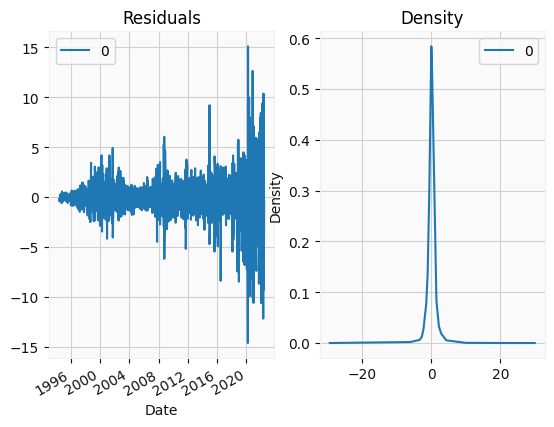

In [49]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

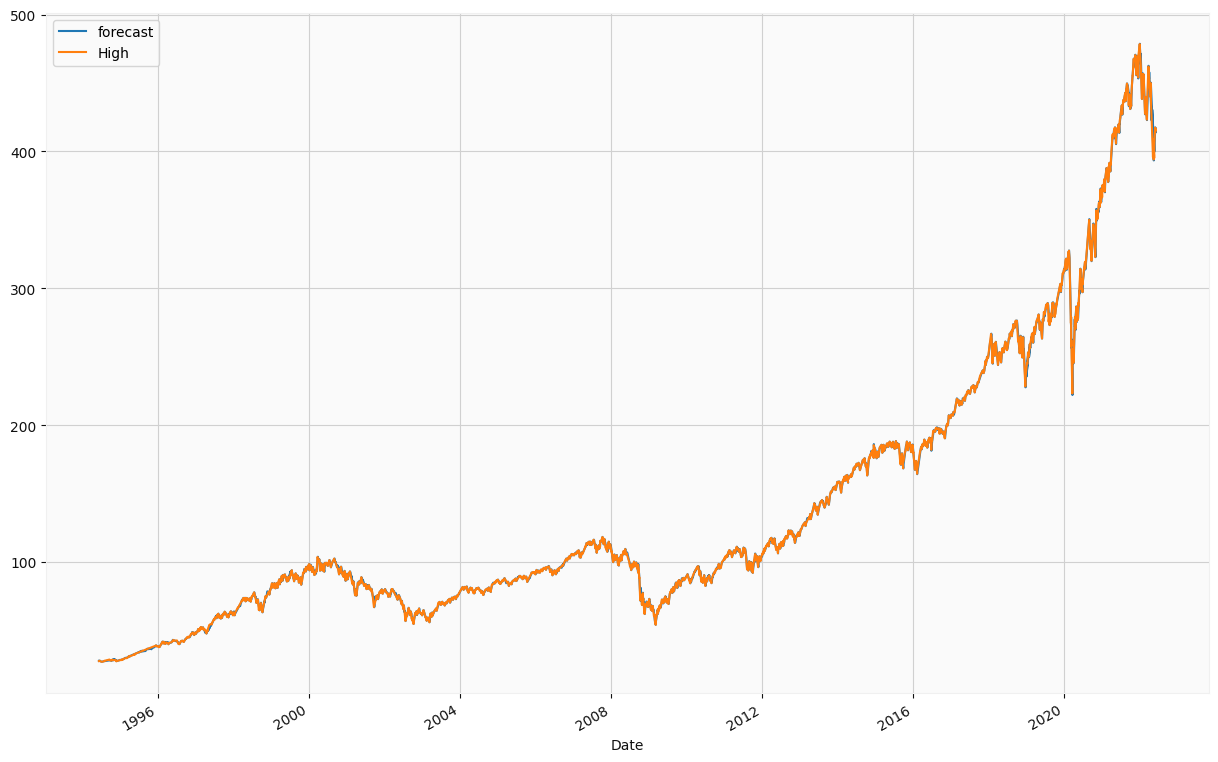

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))
model_fit.plot_predict(dynamic=False, ax=ax)
plt.show()

In [63]:
X = SPY_df["High"]
size = int(len(X) * 0.95)
train = X[:size]
test = X[size:]
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 6698
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11212.085
Method:                       css-mle   S.D. of innovations              1.290
Date:                Wed, 08 Jun 2022   AIC                          22432.171
Time:                        17:17:14   BIC                          22459.409
Sample:                             1   HQIC                         22441.577
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0518      0.017      3.019      0.003       0.018       0.085
ar.L1.D.High     0.3227      0.147      2.194      0.028       0.034       0.611
ma.L1.D.High    -0.2629      0.150     -1.75

In [66]:
fc, se, conf = model_fit.forecast(353, alpha=0.05)

In [67]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


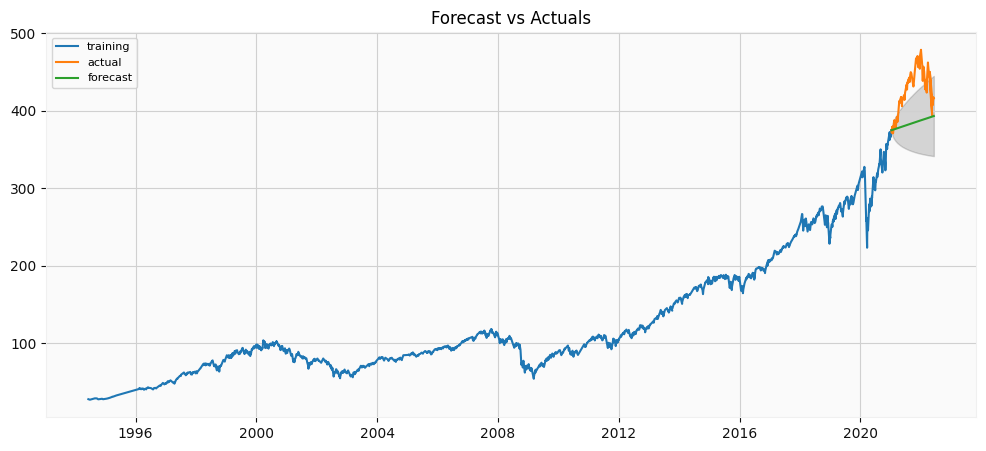

In [68]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(test, fc_series)
RMSE = sqrt(mse)
print(RMSE)

115.4685801467871
